In [1]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv("/Users/mareikekeller/air_quality/data/cleaned_data.csv")
df.head()

,Date,Country,City,aqi,co,d,dew,humidity,mepaqi,neph,...,wind-speed,Latitude,Longitude,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2014-12-29,AT,graz,NaN,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,47.07,15.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,AT,innsbruck,NaN,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,47.26,11.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,AT,linz,NaN,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,48.31,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,AT,salzburg,NaN,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,47.80,13.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,AT,vienna,NaN,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,48.21,16.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data preparation: Manipulating the 'Date' column

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split 'Date' column into 'year', 'month' and 'day'
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove 'Date' column
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)

In [5]:
# Daten für 2014 & 2025 entfernen, weil zu wenige Datenpunkte

df = df[(df["year"] > 2014) & (df["year"] < 2025)]

In [6]:
# Tehran komplett entfernen, weil die Schadstoffwerte zu sehr von allen übrigen Städten abweichen
df = df[df["City"] != "Tehran"]

In [7]:
# Display the first 5 rows of the dataframe
df.head()

,Country,City,aqi,co,d,dew,humidity,mepaqi,neph,no2,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month,day
1226,AT,graz,NaN,0.10,NaN,NaN,NaN,NaN,NaN,22.40,...,-4.00,-6.40,0.40,0.00,NaN,3.50,NaN,2015,1,1
1227,AT,innsbruck,NaN,0.10,NaN,NaN,NaN,NaN,NaN,23.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
1228,AT,linz,NaN,0.10,NaN,NaN,NaN,NaN,NaN,17.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
1229,AT,salzburg,NaN,0.10,NaN,NaN,NaN,NaN,NaN,23.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
1230,AT,vienna,NaN,0.10,NaN,NaN,NaN,NaN,NaN,7.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1


In [9]:
# Spalten mit zu vielen fehlenden Werten entfernen

# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  
missing_percent


Country          0.00
City             0.00
aqi             97.46
co              37.66
d               99.87
dew             41.04
humidity        22.97
mepaqi          99.82
neph            99.71
no2             17.29
o3              22.61
pm1             99.62
pm10            18.85
pm25            15.56
pol             99.69
precipitation   91.77
pressure        23.26
psi             99.98
so2             31.56
temperature     22.87
uvi             98.15
wd              94.80
wind-gust       55.65
wind-speed      24.45
Latitude         0.18
Longitude        0.18
tavg            14.90
tmin            16.79
tmax            16.91
prcp            37.25
wdir            29.24
wspd            24.85
pres            27.23
year             0.00
month            0.00
day              0.00
dtype: float64

In [10]:
# Spalten auswählen, die weniger als 53% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

df_cleaned.head()

,Country,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month,day
1226,AT,graz,0.10,NaN,NaN,22.40,NaN,71.00,NaN,NaN,...,-4.00,-6.40,0.40,0.00,NaN,3.50,NaN,2015,1,1
1227,AT,innsbruck,0.10,NaN,NaN,23.40,NaN,47.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
1228,AT,linz,0.10,NaN,NaN,17.90,NaN,42.00,114.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
1229,AT,salzburg,0.10,NaN,NaN,23.40,NaN,33.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
1230,AT,vienna,0.10,NaN,NaN,7.80,NaN,13.00,57.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1


In [11]:
# Ergebnis ausgeben
print(f"Anzahl der entfernten Spalten: {df.shape[1] - df_cleaned.shape[1]}")
print("Übrige Spalten:", df_cleaned.columns)

Anzahl der entfernten Spalten: 11
Übrige Spalten: Index(['Country', 'City', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind-speed', 'Latitude', 'Longitude',
       'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'year', 'month',
       'day'],
      dtype='object')


In [16]:
weather_vars = ["dew", "humidity", "pressure", "temperature", "wind-speed"]

df_weather = df_cleaned.groupby("City")[weather_vars].mean()
df_weather.head()

,dew,humidity,pressure,temperature,wind-speed
City,,,,,
abha,6.63,49.48,"1,023.08",19.35,3.83
abidjan,24.94,87.74,"1,011.30",27.12,3.13
abu dhabi,18.90,56.50,"1,007.36",29.15,2.96
accra,23.68,82.78,"1,011.43",27.06,4.30
adana,13.06,67.51,"1,011.81",19.96,2.79


In [17]:
df_weather.isna().sum()

dew            17
humidity        0
pressure        0
temperature     0
wind-speed      0
dtype: int64

In [25]:
df_weather[df_weather.isna().any(axis=1)]

,dew,humidity,pressure,temperature,wind-speed
City,,,,,


In [ ]:
# Fehlende Werte interpolieren: lineare Interpolation; die ist möglich, weil wir Daten aus mehreren Jahren haben, d.h. wir schätzen die fehlenden Werte anhand der Werte, die vor und nach dem fehlenden Wert liegen

df_weather = df_weather.interpolate(method="linear")

# Taupunkte für 17 Städte sind Quatsch!

In [23]:
df_weather.head()

,dew,humidity,pressure,temperature,wind-speed
City,,,,,
abha,6.63,49.48,"1,023.08",19.35,3.83
abidjan,24.94,87.74,"1,011.30",27.12,3.13
abu dhabi,18.90,56.50,"1,007.36",29.15,2.96
accra,23.68,82.78,"1,011.43",27.06,4.30
adana,13.06,67.51,"1,011.81",19.96,2.79


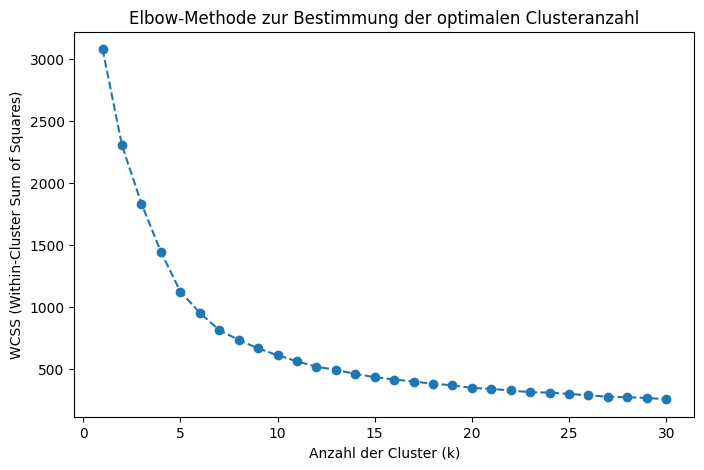

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Wetterdaten skalieren (K-Means ist empfindlich gegenüber Skalen)
scaler = StandardScaler()
df_weather_scaled = scaler.fit_transform(df_weather)

# Optimale Clusteranzahl bestimmen (Elbow-Methode)
wcss = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_weather_scaled)
    wcss.append(kmeans.inertia_)

# Elbow-Plot anzeigen
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), wcss, marker="o", linestyle="--")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusteranzahl")
plt.show()


In [26]:
# K-Means mit k=5 durchführen
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_weather["Weather_Cluster"] = kmeans.fit_predict(df_weather_scaled)

In [27]:
df_weather.head()

,dew,humidity,pressure,temperature,wind-speed,Weather_Cluster
City,,,,,,
abha,6.63,49.48,"1,023.08",19.35,3.83,3
abidjan,24.94,87.74,"1,011.30",27.12,3.13,1
abu dhabi,18.90,56.50,"1,007.36",29.15,2.96,1
accra,23.68,82.78,"1,011.43",27.06,4.30,1
adana,13.06,67.51,"1,011.81",19.96,2.79,1


In [35]:
df_weather.index = df_weather.index.str.title()
df_weather.head()

,dew,humidity,pressure,temperature,wind-speed,Weather_Cluster
City,,,,,,
Abha,6.63,49.48,"1,023.08",19.35,3.83,3
Abidjan,24.94,87.74,"1,011.30",27.12,3.13,1
Abu Dhabi,18.90,56.50,"1,007.36",29.15,2.96,1
Accra,23.68,82.78,"1,011.43",27.06,4.30,1
Adana,13.06,67.51,"1,011.81",19.96,2.79,1


In [36]:
# Neue Cluster-Zuordnung der Städte anzeigen
# df_weather_numbers = df_weather[["Weather_Cluster"]].sort_values(by="Weather_Cluster")
# df_weather_numbers

In [29]:
df_cluster = pd.read_csv("df_cluster.csv", index_col=0)  # Index wiederherstellen
df_cluster.head()  # Überprüfen, ob die Daten korrekt geladen wurden


,co,no2,o3,so2,pm10,pm25,Cluster
City,,,,,,,
Abu Dhabi,-1.16,0.36,1.41,0.46,2.34,1.41,4
Amsterdam,-0.39,-0.04,0.34,-0.96,-0.69,-0.73,0
Ankara,1.33,2.21,-0.55,0.18,0.34,-0.00,3
Athens,-1.16,0.27,1.68,0.05,-0.30,-0.27,0
Belgrade,0.13,0.23,-0.04,0.80,-0.28,0.08,3


In [37]:
df_combined = df_weather.merge(df_cluster, left_index=True, right_index=True)



In [38]:
df_combined.head()

,dew,humidity,pressure,temperature,wind-speed,Weather_Cluster,co,no2,o3,so2,pm10,pm25,Cluster
City,,,,,,,,,,,,,
Abu Dhabi,18.90,56.50,"1,007.36",29.15,2.96,1,-1.16,0.36,1.41,0.46,2.34,1.41,4
Amsterdam,7.75,79.68,"1,014.01",12.01,3.30,0,-0.39,-0.04,0.34,-0.96,-0.69,-0.73,0
Ankara,4.67,56.92,919.94,13.27,1.84,3,1.33,2.21,-0.55,0.18,0.34,-0.00,3
Athens,9.67,59.29,"1,014.31",18.89,3.02,3,-1.16,0.27,1.68,0.05,-0.30,-0.27,0
Belgrade,7.66,62.89,"1,015.53",13.78,2.77,0,0.13,0.23,-0.04,0.80,-0.28,0.08,3


In [39]:
len(df_combined)

53

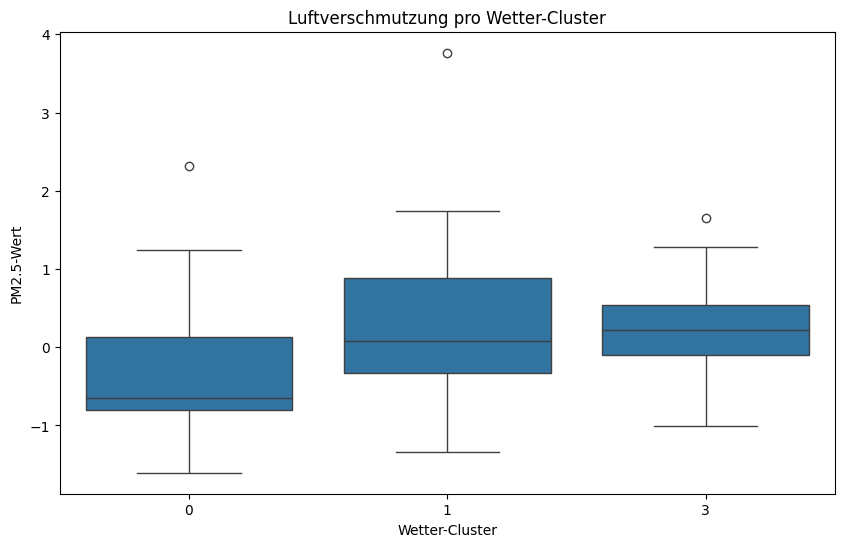

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Weather_Cluster", y="pm25", data=df_combined)
plt.xlabel("Wetter-Cluster")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung pro Wetter-Cluster")
plt.show()


In [41]:
# Abweichung vom Cluster-Durchschnitt berechnen
df_combined["pm25_deviation"] = df_combined.groupby("Weather_Cluster")["pm25"].transform(lambda x: x - x.mean())

# Städte mit deutlich höherer PM2.5-Belastung als ihr Cluster-Durchschnitt
outliers = df_combined[df_combined["pm25_deviation"] > df_combined["pm25_deviation"].std() * 1.5]

outliers


,dew,humidity,pressure,temperature,wind-speed,Weather_Cluster,co,no2,o3,so2,pm10,pm25,Cluster,pm25_deviation
City,,,,,,,,,,,,,,
Delhi,16.30,61.06,984.80,26.25,1.06,1,1.42,1.26,-1.11,0.62,4.71,3.76,2,3.40
Shijiazhuang,6.43,60.59,"1,002.65",13.76,1.58,0,0.71,1.15,1.32,1.87,2.28,2.32,4,2.65
Ulan Bator,-8.22,57.88,"1,015.51",-0.55,2.18,0,0.39,0.89,0.13,3.19,1.79,1.25,4,1.58


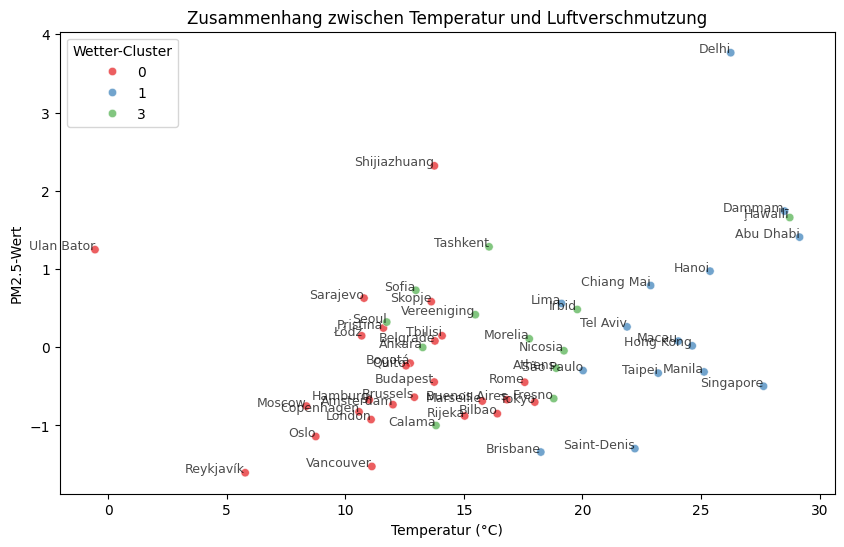

In [42]:
# Sicherstellen, dass "City" eine normale Spalte ist
df_combined = df_combined.reset_index()

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=df_combined["temperature"], 
    y=df_combined["pm25"], 
    hue=df_combined["Weather_Cluster"], 
    palette="Set1", 
    alpha=0.7
)

# Städtenamen als Labels hinzufügen
for i, row in df_combined.iterrows():
    plt.text(row["temperature"], row["pm25"], row["City"], fontsize=9, ha="right", alpha=0.7)

# Achsen & Titel
plt.xlabel("Temperatur (°C)")
plt.ylabel("PM2.5-Wert")
plt.title("Zusammenhang zwischen Temperatur und Luftverschmutzung")
plt.legend(title="Wetter-Cluster")

plt.show()


Abu Dhabi 🇦🇪	Wüstenstaub (natürliche PM2.5), Öl-Industrie, wenig Wind

Delhi 🇮🇳	Verkehr, Industrie, Kohlekraftwerke, Wetter-Inversionen

Shijiazhuang 🇨🇳	Starke Industrialisierung (Stahlproduktion), Kohlekraftwerke

Ulan Bator 🇲🇳	Kohleheizungen im Winter, extreme Kälte, Luftstagnation

## Analyse zum Einfluss der Jahreszeit

In [43]:
df_city_avg = df.groupby("City")[["year", "month", "pm25"]].mean().reset_index()
df_city_avg.head()

,City,year,month,pm25
0,abha,"2,019.96",6.58,NaN
1,abidjan,"2,021.98",6.81,68.34
2,abu dhabi,"2,020.76",6.08,98.72
3,accra,"2,021.83",6.61,70.43
4,adana,"2,020.09",5.80,68.21


In [46]:
len(df_city_avg)

616

In [47]:
df_combined.head()

,City,dew,humidity,pressure,temperature,wind-speed,Weather_Cluster,co,no2,o3,so2,pm10,pm25,Cluster,pm25_deviation
0,Abu Dhabi,18.90,56.50,"1,007.36",29.15,2.96,1,-1.16,0.36,1.41,0.46,2.34,1.41,4,1.04
1,Amsterdam,7.75,79.68,"1,014.01",12.01,3.30,0,-0.39,-0.04,0.34,-0.96,-0.69,-0.73,0,-0.41
2,Ankara,4.67,56.92,919.94,13.27,1.84,3,1.33,2.21,-0.55,0.18,0.34,-0.00,3,-0.25
3,Athens,9.67,59.29,"1,014.31",18.89,3.02,3,-1.16,0.27,1.68,0.05,-0.30,-0.27,0,-0.52
4,Belgrade,7.66,62.89,"1,015.53",13.78,2.77,0,0.13,0.23,-0.04,0.80,-0.28,0.08,3,0.41


In [48]:
len(df_combined)

53

In [49]:
# Nur die relevanten Spalten behalten
df_monthly = df_cleaned[["City", "year", "month", "pm25"]].copy()

# Sicherstellen, dass "City" ein String ist
df_monthly["City"] = df_monthly["City"].astype(str)
df_combined["City"] = df_combined["City"].astype(str)

# Merge mit den Wetter-Clustern aus df_combined
df_with_month = df_monthly.merge(df_combined[["City", "Weather_Cluster", "Cluster"]], on="City", how="left")

# Überprüfen, ob der Merge funktioniert hat
print(df_with_month.head())
print(df_with_month.isna().sum())  # Prüfen, ob Werte fehlen



        City  year  month   pm25  Weather_Cluster  Cluster
0       graz  2015      1    NaN              NaN      NaN
1  innsbruck  2015      1    NaN              NaN      NaN
2       linz  2015      1 114.00              NaN      NaN
3   salzburg  2015      1    NaN              NaN      NaN
4     vienna  2015      1  57.00              NaN      NaN
City                     0
year                     0
month                    0
pm25                238424
Weather_Cluster    1532110
Cluster            1532110
dtype: int64


KeyboardInterrupt: 

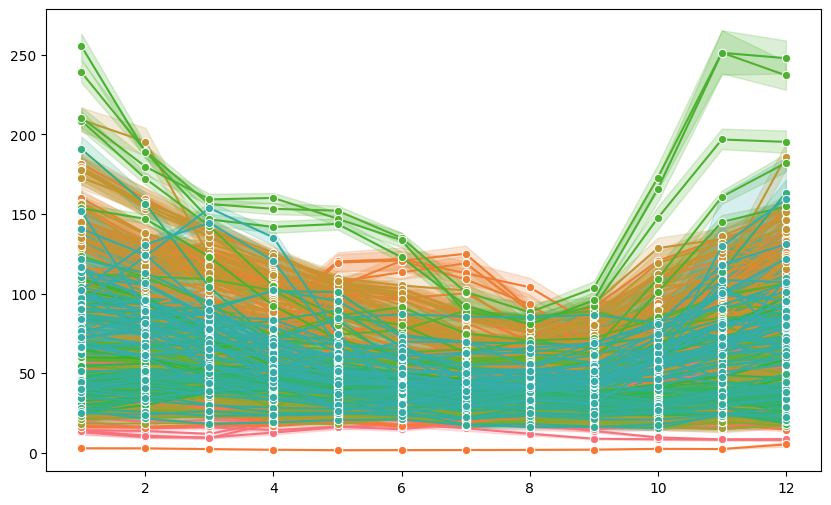

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_with_month, x="month", y="pm25", hue="City", marker="o")
plt.xlabel("Monat")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung (PM2.5) in verschiedenen Monaten")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.legend(title="Stadt")
plt.show()


In [ ]:
# Nur die drei relevanten Städte auswählen
selected_cities = ["Delhi", "Shijiazhuang", "Ulan Bator", "Abu Dhabi"]
df_winter = df_with_month[df_with_month["City"].isin(selected_cities)]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_winter, x="month", y="pm25", hue="City", marker="o", palette="Set1")
plt.xlabel("Monat")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung (PM2.5) über das Jahr – Vergleich für Delhi, Shijiazhuang & Ulan Bator")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.legend(title="Stadt")

# plt.savefig("../Images/pm25_per_month_top_4.png", dpi=300, bbox_inches="tight")

plt.show()
